# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

import os

curr_dir = os.getcwd()

training_file = curr_dir + "/" + "traffic-signs-data/train.p"
validation_file=curr_dir + "/traffic-signs-data/valid.p"
testing_file = curr_dir + "/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
#print(X_train[0])
n_train = len(X_train)
print(n_train)
print(y_train[1:10])
print(len(sorted(y_train)))

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
34799
[41 41 41 41 41 41 41 41 41]
34799


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
sorted_ytrain = sorted(y_train)
#print(sorted_ytrain[1:10])
#print(y_train[1:10])
count = 1
temp_label = sorted_ytrain[0]
for label in sorted_ytrain[:]:
    if (label !=  temp_label):
        count = count + 1
        temp_label = label

n_classes = count

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

histogram (array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
        1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
         360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
         240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
         210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
         300.,   210.,   210.,     0.,     0.,     0.,     0.,     0.,
           0.]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), <a list of 49 Patch objects>)
mean for category count: 710.1836734693877


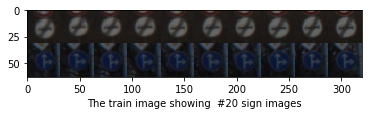

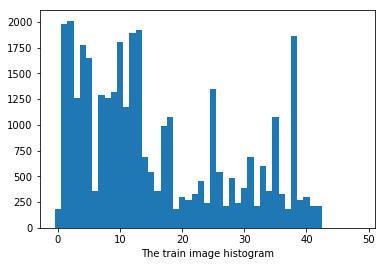

(32, 32, 3)


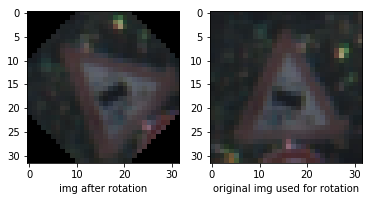

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

X_train_array = np.array(X_train)

show_train = np.concatenate((X_train_array[0:10]) , axis=1)
show_train1 = np.concatenate((X_train_array[1000:1010]) , axis=1)
sign_image = np.concatenate((show_train, show_train1), axis=0)
    
plt.xlabel("The train image showing  #20 sign images")
plt.figure(1)
plt.imshow(sign_image)
#print(X_train[0])

plt.figure(2)

#plot histogram of train image in terms of sign type
bin = np.array([i for i in range(0, 50)])
#print(bin)
hist_y = plt.hist(y_train, bin, align="left")
plt.xlabel("The train image histogram")
print("histogram {}" .format(hist_y))
print("mean for category count: {}".format(np.mean(hist_y[0])))
plt.bar( hist_y[1][:49], hist_y[0])
plt.show()

#augument the data by rotation, x-flip, y-flip transform
import scipy.ndimage

def rotate_sparse_img(image, rotation=0):
    rows,cols = image.shape[0] ,  image.shape[1]
    #print("rows and col{}".format(image.shape))
    #print(rows, cols)
    #M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    #dst = cv2.warpAffine(img,M,(cols,rows))
    dst = scipy.ndimage.interpolation.rotate(image, rotation, reshape=0)
    return dst

# affine transform doesn't work on all channel
def flip_img(image, x_flip=0, y_flip=0):
    rows,cols = image.shape[0], image.shape[1]
    a , c = 1, 1
    if x_flip == 1:
        a = -a
    if y_flip == 1:
        c = -c
    #M = np.array([[a,0,0],[0,c,0]])
    filt = [[1, 0 ,-20], [0,1,-20], [0,0,1]]
    M = np.array(filt, dtype=np.float32)
    print( M)
    #print(image)
    #scipy.ndimage.interpolation.affine_transform, 
    dst = scipy.ndimage.interpolation.affine_transform(image, M, output_shape=(32,32,3))
    #dst = cv2.warpAffine(img,M,(cols,rows))
    return dst
    
#rotate_img = flip_img(X_train[0], x_flip=1)
#example of rotated image
rotate_img = rotate_sparse_img(X_train[2000], rotation=45)

print(np.array(rotate_img).shape)

plt.figure(3)
plt.subplot(121)
plt.xlabel("img after rotation")
plt.imshow(rotate_img)
plt.subplot(122)
plt.xlabel("original img used for rotation")
plt.imshow(X_train[2000])



Building New train data base...
(23278, 32, 32, 3)
23278


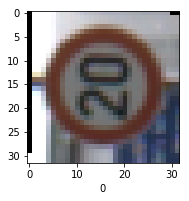

In [4]:
#Augumentaion  list of under represented image
import math

def get_sparse_list(hist_img):
    """
    Based on image cnt histogram it returns list of sparse category 
    and list image add cnt needed for each category
    """
    avg_cnt_per_category = np.mean(hist_img[0])
    avg_cnt_per_category = int(avg_cnt_per_category * 1)
    count = 0
    sparse_category = []
    img_add_cnt = []
    #print(hist_y)
    for img_count in hist_img[0]:
        if (img_count < avg_cnt_per_category) and img_count !=0 :
            sparse_category.append(hist_img[1][count])
            add_cnt = (avg_cnt_per_category - img_count) + img_count - 1
            add_cnt = int(math.ceil((add_cnt / img_count)))
            img_add_cnt.append(add_cnt)
        count = count + 1
    return [sparse_category, img_add_cnt]

#print(sparse_category)
#print(img_add_cnt)
#print(type(X_train))

#add image
def get_image(x_train, y_train, img_category):
    """
    Get list of image for a given category from numpy array img input list
    """
    image_in_category = []
    label_in_category = []
    count = 0
    for label in y_train:
        if label == img_category:
            label_in_category.append(label)
            image_in_category.append(x_train[count])
        count = count + 1
    #print(label_in_category[0])
    #print(np.array(image_in_category).shape)
    return [image_in_category, label_in_category]

def add_rotate_image(image, #image list
                     label, #label list
                     add_count = 0):
    """
    build rotated image list form a particular category list image
    """
    #print(add_count)
    #print(np.array(image).shape, add_count)
    rotated_img = []
    rotated_label = []
    #i = 0
    for img in image:
        for cnt in range(1, add_count+1):
            rotate = (90 * cnt) % 360
            if(cnt > 3 ):
                #print(rotate, "rot=----")
                rotate = (45 * (cnt-3)) % 360
            #print(img.shape, type(img.shape))
            #plt.imshow(img)
            rot_img = rotate_sparse_img(img, rotation=rotate)
            rotated_img.append(rot_img)
            rotated_label.append(label[0])
            #break
        #break      
        #i = i + 1
    
    #print(np.array(rotated_img).shape, "--rot_img")
    
    return [rotated_img, rotated_label]

        
            

#get sparse category
def build_extra_image_base(x_train, y_train, sparse_category, img_add_cnt):
    #pass
    build_X_train = []
    build_Y_train = []
    count = 0
    for label in sparse_category:
        sparse_list_img_category = get_image(x_train, y_train, label)
        #print(np.array(sparse_list_img_category[0]).shape)
                #rotate the image
        #plt.imshow(sparse_list_img_category[0][0])    
        gen_image = add_rotate_image(sparse_list_img_category[0], sparse_list_img_category[1],
                                     add_count = img_add_cnt[count])
        
        #print(type(gen_image[0]),np.array(gen_image[0]).shape)
        
        #print(np.array(gen_image[0]).shape)
        #print(np.array(build_X_train[0]).shape)

        build_X_train.extend(gen_image[0])
        build_Y_train.extend(gen_image[1])
        count = count + 1
        
        #print(np.array(build_X_train).shape)

    return [build_X_train, build_Y_train]
                
    
######

print("Building New train data base...")
sparse_list = get_sparse_list(hist_y)
extra_img_db = build_extra_image_base(X_train, y_train, sparse_list[0], sparse_list[1])

print(np.array(extra_img_db[0]).shape)

#sparse_image_in_category = get_image(X_train, y_train, sparse_category[0])
plt.subplot(121)
print(len(extra_img_db[1]))
plt.xlabel(extra_img_db[1][200])
#print(sparse_image_in_category[0].shape)
plt.imshow(extra_img_db[0][200])


34799 34799 23278 23278
58077
(34799, 32, 32, 3)
(23278, 32, 32, 3)
(58077, 32, 32, 3)


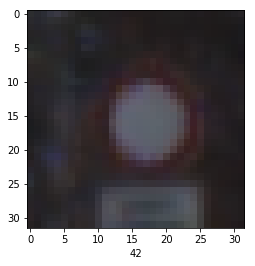

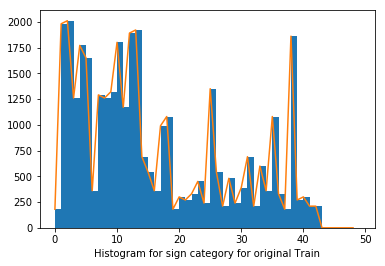

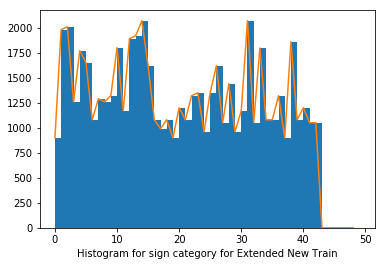

In [5]:
plt.xlabel(extra_img_db[1][23000])
#print(sparse_image_in_category[0].shape)
plt.imshow(extra_img_db[0][23000])

#merge two list
def merge_data_base(x_train, y_train, ext_x_train, ext_y_train):
    
    new_train_X = []
    new_train_y = []

    len_x_train = len(x_train)
    len_y_train = len(y_train)
    len_ext_x_train = len(ext_x_train)
    len_ext_y_train = len(ext_y_train)
    print(len_x_train, len_y_train, len_ext_x_train, len_ext_y_train)
    
    new_train_X.extend(x_train)
    new_train_y.extend(y_train)

    new_train_X.extend(ext_x_train)
    new_train_y.extend(ext_y_train)
    return [new_train_X, new_train_y]

#merge
new_train_example = merge_data_base (X_train, y_train, extra_img_db[0], extra_img_db[1])
print(len(new_train_example[0]))
plt.figure(1)    

plt.imshow(new_train_example[0][30000])

print(X_train.shape)
print(np.array(extra_img_db[0]).shape)

print(np.array(new_train_example[0]).shape)

def plot_histogram_category(y_train):
    hist_bin = [i for i in range(50)]
    hist = plt.hist(y_train, hist_bin)
    plt.plot(hist_bin[:49], hist[0])
    #print(hist)
    plt.show()

plt.figure(2)
plt.xlabel("Histogram for sign category for original Train")
plot_histogram_category(y_train)

plt.figure(3)    
plt.xlabel("Histogram for sign category for Extended New Train")
plot_histogram_category(new_train_example[1])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import numpy as np

new_y_train = np.asarray(new_train_example[1])
new_X_train = np.asarray(new_train_example[0])

new_y_train_1 = y_train
new_X_train_1 = X_train

print(type(new_y_train), new_y_train.shape, new_X_train.shape)
print(type(new_y_train_1), new_y_train_1.shape, new_X_train_1.shape)

train_mean = np.mean(new_X_train)
train_sigma = np.std(new_X_train) 

print(train_mean, train_sigma, "---train Data stats")

#normalize the data set
#X_train_norm = np.subtract(np.array(X_train, dtype=float), 128)/128
X_train_norm = np.subtract(np.array(new_X_train, dtype=np.float32), train_mean)/train_sigma
print(X_train_norm[0][0][0])
#print(X_train[0][0][0])
print(new_X_train[0][0][0])

#randomly shuffle the normalised train data
from sklearn.utils import shuffle
#X_train_norm, y_train_norm = shuffle(X_train_norm, y_train)
X_train_norm, y_train_norm = shuffle(X_train_norm, new_y_train)
#plt.imshow(X_train[0])
#plt.imshow(X_train_norm[0])

<class 'numpy.ndarray'> (58077,) (58077, 32, 32, 3)
<class 'numpy.ndarray'> (34799,) (34799, 32, 32, 3)
82.1362182134 67.444971086 ---train Data stats
[-0.80267239 -0.84715313 -0.86198002]
[28 25 24]


Cross check normalized image can be restored and displayed
[ 0.10176867  0.07211486  0.17590319]



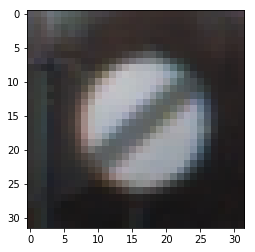

In [7]:
print("Cross check normalized image can be restored and displayed")
plt.imshow(np.array(X_train_norm[0] * train_sigma + train_mean, dtype=np.uint8))
print(X_train_norm[0][0][0])
print()

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128


In [9]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

def create_weight_bias(weights, bias, mu=0, sigma=0.1, identifier="param_set0"):
    
    if 1:
        weights = \
        {
            "WT_CL1":tf.Variable(tf.truncated_normal([5,5,3, 6*3], mu, sigma), name="WT_CL1"),
            "WT_CL2":tf.Variable(tf.truncated_normal([5,5,6*3, 28], mu, sigma), name="WT_CL2"),

            "WT_FL3":tf.Variable(tf.truncated_normal([700,120], mu, sigma), name="WT_FL3"),
            "WT_FL4":tf.Variable(tf.truncated_normal([120,84], mu, sigma), name="WT_FL4"),
            "WT_FL5":tf.Variable(tf.truncated_normal([84,n_classes], mu, sigma), name="WT_FL5"),

            "WT_CL1_TEMP":tf.Variable(tf.truncated_normal([5,5,6*3, 6*3], mu, sigma), name="WT_CL1_TEMP"),
            "WT_CL1_TEMP0":tf.Variable(tf.truncated_normal([5,5,6*3, 6*3], mu, sigma) , name="WT_CL1_TEMP0"),

            "WT_CL1_TEMP1":tf.Variable(tf.truncated_normal([5,5,28, 28], mu, sigma), name="WT_CL1_TEMP1"),
            "WT_CL1_TEMP10":tf.Variable(tf.truncated_normal([5,5,28, 28], mu, sigma), name="WT_CL1_TEMP10"),

        }
        bias = \
        {
            "B_CL1":tf.Variable(tf.truncated_normal([6*3], mu, sigma), name="B_CL1"),
            "B_CL2":tf.Variable(tf.truncated_normal([28], mu, sigma), name="B_CL2"),

            "B_FL3":tf.Variable(tf.truncated_normal([120], mu, sigma), name="B_FL3"),
            "B_FL4":tf.Variable(tf.truncated_normal([84], mu, sigma), name="B_FL4"),
            "B_FL5":tf.Variable(tf.truncated_normal([n_classes], mu, sigma) , name="B_FL5"),

            "B_CL1_TEMP":tf.Variable(tf.truncated_normal([6*3], mu, sigma) , name="B_CL1_TEMP"),
            "B_CL1_TEMP0":tf.Variable(tf.truncated_normal([6*3], mu, sigma), name="B_CL1_TEMP0"),

            "B_CL1_TEMP1":tf.Variable(tf.truncated_normal([28], mu, sigma), name="B_CL1_TEMP1"),
            "B_CL1_TEMP10":tf.Variable(tf.truncated_normal([28], mu, sigma), name="B_CL1_TEMP10"),

        }
    else:
        weights = \
        {
            "WT_CL1":tf.Variable(tf.truncated_normal([5,5,3, 6*3*2*2], mu, sigma), name="WT_CL1"),
            "WT_CL2":tf.Variable(tf.truncated_normal([5,5,6*3*2*2, 72], mu, sigma), name="WT_CL2"),

            "WT_FL3":tf.Variable(tf.truncated_normal([1800,600], mu, sigma), name="WT_FL3"),
            "WT_FL4":tf.Variable(tf.truncated_normal([600,200], mu, sigma), name="WT_FL4"),
            "WT_FL5":tf.Variable(tf.truncated_normal([200,n_classes], mu, sigma), name="WT_FL5"),

            "WT_CL1_TEMP":tf.Variable(tf.truncated_normal([5,5,6*3*2*2, 6*3*2*2], mu, sigma), name="WT_CL1_TEMP"),
            "WT_CL1_TEMP0":tf.Variable(tf.truncated_normal([5,5,6*3*2*2, 6*3*2*2], mu, sigma) , name="WT_CL1_TEMP0"),

            "WT_CL1_TEMP1":tf.Variable(tf.truncated_normal([5,5,72, 72], mu, sigma), name="WT_CL1_TEMP1"),
            "WT_CL1_TEMP10":tf.Variable(tf.truncated_normal([5,5,72, 72], mu, sigma), name="WT_CL1_TEMP10"),

        }
        bias = \
        {
            "B_CL1":tf.Variable(tf.truncated_normal([6*3*2*2], mu, sigma), name="B_CL1"),
            "B_CL2":tf.Variable(tf.truncated_normal([72], mu, sigma), name="B_CL2"),

            "B_FL3":tf.Variable(tf.truncated_normal([600], mu, sigma), name="B_FL3"),
            "B_FL4":tf.Variable(tf.truncated_normal([200], mu, sigma), name="B_FL4"),
            "B_FL5":tf.Variable(tf.truncated_normal([n_classes], mu, sigma) , name="B_FL5"),

            "B_CL1_TEMP":tf.Variable(tf.truncated_normal([6*3*2*2], mu, sigma) , name="B_CL1_TEMP"),
            "B_CL1_TEMP0":tf.Variable(tf.truncated_normal([6*3*2*2], mu, sigma), name="B_CL1_TEMP0"),

            "B_CL1_TEMP1":tf.Variable(tf.truncated_normal([72], mu, sigma), name="B_CL1_TEMP1"),
            "B_CL1_TEMP10":tf.Variable(tf.truncated_normal([72], mu, sigma), name="B_CL1_TEMP10"),

        }
        
    return {"w": weights, "b": bias}




def add_conv_layer(in_x, weight, bias, stride, padding, identifier):
    conv = tf.nn.conv2d(in_x, weight, stride, padding, name=identifier+"_conv")
    conv_layer = tf.nn.bias_add(conv, bias, name=identifier +"_bias")
    return conv_layer

def add_activation_layer(in_x, activation_type, identifier):
    activation = tf.nn.relu(in_x, name = identifier)
    return activation
    
def LeNet_modified(x, weights=None, bias=None):    

    #print(weights)
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    
    if (weights == None) and (bias == None):
        print("!!! Error Weights and bias should not be None")
        return None

    CL1_stride = [1,1,1,1]
    CL1 = tf.nn.conv2d(x, weights["WT_CL1"], CL1_stride, "VALID")
    CL1 = tf.nn.bias_add(CL1, bias["B_CL1"])
        
    # Activation.
    AL1 = tf.nn.relu(CL1, name="AL1")

    ##
    if 1:
        temp_conv = add_conv_layer(AL1,  weights["WT_CL1_TEMP"],  bias["B_CL1_TEMP"], 
                                   CL1_stride, "SAME", identifier = "temp_conv")
        temp_activation = add_activation_layer(temp_conv, 0, identifier="temp_activation")

        temp0_conv = add_conv_layer(temp_activation,  weights["WT_CL1_TEMP0"],  bias["B_CL1_TEMP0"], 
                                    CL1_stride, "SAME", identifier = "temp0_conv")
        temp0_activation = add_activation_layer(temp0_conv, 0, identifier="temp0_activation")
    else:
        temp0_activation = AL1

    #AL1 = temp_activation
    ###
    
    # Pooling. Input = 28x28x18. Output = 14x14x18.
    PL1 = tf.nn.max_pool(temp0_activation, [1,2,2,1], [1, 2,2,1], "VALID", name="PL1")

    # Layer 2: Convolutional. Output = 10x10x18.

    CL2_stride = [1,1,1,1]
    CL2 = tf.nn.conv2d(PL1, weights["WT_CL2"], CL2_stride, "VALID")
    CL2 = tf.nn.bias_add(CL2, bias["B_CL2"])
    
    
    # Activation.
    AL2 = tf.nn.relu(CL2, name="AL2")
  


    ####
    if 1:
    
        temp1_conv = add_conv_layer(AL2,  weights["WT_CL1_TEMP1"],  bias["B_CL1_TEMP1"], 
                                    CL1_stride, "SAME", identifier="temp1_conv")
        temp1_activation = add_activation_layer(temp1_conv, 0, identifier="temp1_activation")
        #AL2 = temp_activation

        temp10_conv = add_conv_layer(temp1_activation,  weights["WT_CL1_TEMP10"],  bias["B_CL1_TEMP10"], 
                                     CL1_stride, "SAME", identifier="temp10_conv")
        temp10_activation = add_activation_layer(temp10_conv, 0, identifier="temp10_activation")
        #AL2 = temp_activation
    else:
        temp10_activation = AL2

    ####
    # Pooling. Input = 10x10x18. Output = 5x5x18.
    PL2 = tf.nn.max_pool(temp10_activation, [1,2,2,1], [1, 2,2,1], "VALID")

    
    
    # Flatten. Input = 5x5x18. Output = 400.
    FLAT = tf.contrib.layers.flatten(PL2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    outL3 = tf.add(tf.matmul(FLAT, weights["WT_FL3"]), bias["B_FL3"])
    
    # Activation.
    AL3 = tf.nn.relu(outL3, name = "AL3")
 

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    outL4 = tf.add(tf.matmul(AL3, weights["WT_FL4"]), bias["B_FL4"])

    
    # Activation.
    AL4 = tf.nn.relu(outL4, "AL4")

    #Layer 5: Fully Connected. Input = 84. Output = 10.
    
    logits = tf.add(tf.matmul(AL4, weights["WT_FL5"]), bias["B_FL5"], name="logits")
                                            
    return logits

In [10]:

#create placeholder and Variables for the Model

def create_input_placeholder(x, y, rate, lambda_reg):
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    rate = tf.placeholder(tf.float32, (None))
    lambda_reg = tf.placeholder(tf.float32, (None))
    #print(x, y, rate, lambda_reg)
    return {"x":x, 
            "y":y, 
            "rate":rate, 
            "lambda":lambda_reg }


x = y = rate = lambda_reg = None
input_placeholder = create_input_placeholder(x, y, rate, lambda_reg)
x = input_placeholder["x"]
y = input_placeholder["y"]
rate = input_placeholder["rate"]
lambda_reg = input_placeholder["lambda"]

weights = bias = None
w_b_variable = create_weight_bias(weights, bias, mu=0, sigma=0.1, identifier="train")
#print(x, y)
#print(weights, bias)
weights = w_b_variable["w"]
bias = w_b_variable["b"]

#print(x, y)
#print(weights, bias)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [12]:
#trian the pipeline
#rate = 0.001
#lambda_reg = 0.4/BATCH_SIZE

one_hot_y = tf.one_hot(y, n_classes)
logits = LeNet_modified(x, weights=weights, bias=bias)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)

#reg not used yet
if 1:
    reg_loss = tf.nn.l2_loss(weights["WT_CL1"]) + tf.nn.l2_loss(weights["WT_CL2"]) \
        + tf.nn.l2_loss(weights["WT_FL3"])+ tf.nn.l2_loss(weights["WT_FL4"]) + tf.nn.l2_loss(weights["WT_FL5"]) \
        + tf.nn.l2_loss(weights["WT_CL1_TEMP"])+ tf.nn.l2_loss(weights["WT_CL1_TEMP1"])\
        + tf.nn.l2_loss(weights["WT_CL1_TEMP0"]) + tf.nn.l2_loss(weights["WT_CL1_TEMP10"])
else:
    reg_loss = tf.nn.l2_loss(weights["WT_CL1"]) + tf.nn.l2_loss(weights["WT_CL2"]) \
        + tf.nn.l2_loss(weights["WT_FL3"])+ tf.nn.l2_loss(weights["WT_FL4"]) + tf.nn.l2_loss(weights["WT_FL5"])


loss_operation = tf.reduce_mean(cross_entropy)
loss_operation_reg = loss_operation + lambda_reg * reg_loss
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation_reg)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    #print(X_data.shape)
    #print(y_data.shape)
    total_accuracy = 0
    sess = tf.get_default_session()

    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print(batch_x.shape, offset, batch_y.shape)
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    #X_valid_norm = (np.array(X_valid, dtype=float) - 128)/128
    X_valid_norm = (np.array(X_valid, dtype=float) - train_mean)/train_sigma

    #BATCH_SIZE = 1
    #EPOCHS = 1
    for i in range(EPOCHS):
        X_train_norm, y_train_norm = shuffle(X_train_norm, y_train_norm)
        
        train_accuracy = evaluate(X_train_norm[0:12000], y_train_norm[0:12000])
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy at start of epoch {:.3f}".format(train_accuracy))
        print()
  
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #end = offset + 1
            batch_x, batch_y = X_train_norm[offset:end], y_train_norm[offset:end]
            sess.run(training_operation, 
                     feed_dict={x: batch_x, y: batch_y, rate:0.001, lambda_reg : 0.2/BATCH_SIZE})
            #debug rkb
            #break

        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy after parameter update= {:.3f}".format(validation_accuracy))
        print()
        print("saving parameter file at current iteration" )
        saver.save(sess, './CNN_german_traffic_sign-final', global_step=i)
        #break

    #saver.save(sess, './CNN_german_traffic_sign', global_step=i)
    print("Model saved")
    print("Model trained")
    
    #test data accuracy
    #X_test_norm = (np.array(X_test, dtype=float) - 128)/128
    X_test_norm = (np.array(X_test, dtype=float) - train_mean)/train_sigma
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    

Training...

EPOCH 1 ...
Train Accuracy at start of epoch 0.023

EPOCH 1 ...
Validation Accuracy after parameter update= 0.865

saving parameter file at current iteration
EPOCH 2 ...
Train Accuracy at start of epoch 0.938

EPOCH 2 ...
Validation Accuracy after parameter update= 0.900

saving parameter file at current iteration
EPOCH 3 ...
Train Accuracy at start of epoch 0.965

EPOCH 3 ...
Validation Accuracy after parameter update= 0.933

saving parameter file at current iteration
EPOCH 4 ...
Train Accuracy at start of epoch 0.984

EPOCH 4 ...
Validation Accuracy after parameter update= 0.926

saving parameter file at current iteration
EPOCH 5 ...
Train Accuracy at start of epoch 0.980

EPOCH 5 ...
Validation Accuracy after parameter update= 0.932

saving parameter file at current iteration
EPOCH 6 ...
Train Accuracy at start of epoch 0.990

EPOCH 6 ...
Validation Accuracy after parameter update= 0.943

saving parameter file at current iteration
EPOCH 7 ...
Train Accuracy at start of 

In [ ]:
#print(weights)

#Below code is for calculating prediction once model is trained 

In [15]:
#calculate final train, valid, test set accuracy after clearing wt,bias vairable and reloading from file

import numpy as np
# Stats for Top-1 accuracy
#tf.reset_default_graph()
saver1 = tf.train.Saver()
#
print("Accuracy Stats on Train, Valid and test data set")
with tf.Session() as sess:
  #  saver = tf.train.Saver()
    #clean up previous weights and reinstall from checkpoint file
    sess.run(tf.global_variables_initializer())
    #print(sess.run(weights))
    #saver1.restore(sess, tf.train.latest_checkpoint('.'))
    saver1.restore(sess, './CNN_german_traffic_sign-final-17')
    
    #w = sess.run(weights)
    #b = sess.run(bias)
    #print(w)
    print("Accuracy Top-1 after model being trained ")
    #Train data accuracy on non augumentated 
    X_train_norm = (np.array(X_train, dtype=float) - train_mean)/train_sigma
    train_accuracy = evaluate(X_train_norm[:], y_train[:])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print()
    
    if 1:
        #valid data accuracy
        X_valid_norm = (np.array(X_valid, dtype=float) - train_mean)/train_sigma
        validation_accuracy = evaluate(X_valid_norm[:], y_valid[:])
        print("Validation Accuracy after model train = {:.3f}".format(validation_accuracy))
        print()

        #test data accuracy
        X_test_norm = (np.array(X_test, dtype=float) - train_mean)/train_sigma
        test_accuracy = evaluate(X_test_norm[:], y_test[:])
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()


Accuracy Stats on Train, Valid and test data set
Accuracy Top-1 after model being trained 
Train Accuracy = 0.996

Validation Accuracy after model train = 0.970

Test Accuracy = 0.950



In [16]:
# build the graph for prediction once training of the model is over

total_classes = n_classes
def build_pred_graph(x, y, w, b):
    logits = LeNet_modified(x, weights=w, bias=b)
    soft_max = tf.nn.softmax(logits=logits,  name="pred_soft_max")
    one_hot_y = tf.one_hot(y, total_classes)
    return [logits, soft_max, one_hot_y]

x_i = tf.placeholder(tf.float32,(None, 32, 32, 3))
y_i = tf.placeholder(tf.int32, (None))
pred_tensor = build_pred_graph(x_i,y_i, w=weights, b=bias) 

actual_pred = tf.equal(tf.argmax(pred_tensor[1], 1), 
                       tf.argmax(pred_tensor[2], 1))

#tf.nn.top_k(input, k=1, sorted=True, name=None)

top_5_prob, top_5_index = tf.nn.top_k(pred_tensor[1], k=5) 
    

In [29]:
#load the data
print("Test to check prediction is working with Top 5 accuracy ")
X_test_norm = (np.array(X_test[:10], dtype=float) - 128)/128
saver3 = tf.train.Saver()

with tf.Session() as sess:
    #load the parameter
    #reset the already created buffer
    sess.run(tf.global_variables_initializer())
    #saver3.restore(sess, tf.train.latest_checkpoint('.'))
    saver3.restore(sess, './CNN_german_traffic_sign-final-17')

    #w = sess.run(weights)
    #b = sess.run(bias)
    
    #get pred_tensor 
    feed_input = {x_i:X_test_norm[:], y_i: y_test[:10]}
    prediction_out = sess.run(pred_tensor, feed_input)
    top_5_prob_out = sess.run(top_5_prob, feed_input)
    top_5_index_out = sess.run(top_5_index, feed_input)
    actual_pred_out = sess.run(actual_pred, feed_input)
    
    top_1_pred_accuracy = np.mean(actual_pred_out)
    np.set_printoptions(suppress=True)
    print("Prediction on 10 test Image")
    print("Top-5 prob: {}" .format(top_5_prob_out))
    print()
    print("Top-5 prob indices {}".format(top_5_index_out))
    print()
    print("Top-1 prediction output {}".format(actual_pred_out))
    print()
    print("Top-1 pred accuracy {}".format(top_1_pred_accuracy))
    print()


Test to check prediction is working with Top 5 accuracy 
Prediction on 10 test Image
Top-5 prob: [[ 0.99999964  0.00000038  0.00000002  0.00000001  0.        ]
 [ 0.99999797  0.00000179  0.00000025  0.00000003  0.00000002]
 [ 0.99999762  0.00000229  0.00000011  0.00000004  0.00000001]
 [ 1.          0.00000001  0.          0.          0.        ]
 [ 0.99994385  0.00004723  0.00000678  0.00000094  0.00000051]
 [ 0.99999607  0.00000324  0.0000004   0.00000038  0.00000002]
 [ 0.99999964  0.00000022  0.00000007  0.00000002  0.        ]
 [ 0.99997985  0.00000629  0.00000454  0.00000437  0.0000013 ]
 [ 0.99995685  0.00001474  0.00000823  0.00000655  0.00000325]
 [ 0.93058217  0.06796014  0.00068077  0.00038778  0.00017773]]

Top-5 prob indices [[16 28  5 40  3]
 [ 1  2  5  4  6]
 [38 39 34 40 12]
 [33 36 37 39 41]
 [11 27 18 21 40]
 [38 39 40 34 12]
 [18 27 26 11 28]
 [12 34 32 42 16]
 [25 24 20  0 29]
 [35 36 33  9 34]]

Top-1 prediction output [ True  True  True  True  True  True  True  Tr

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

11


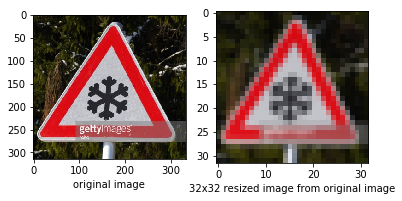

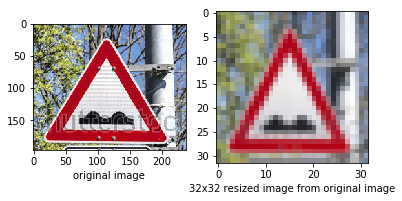

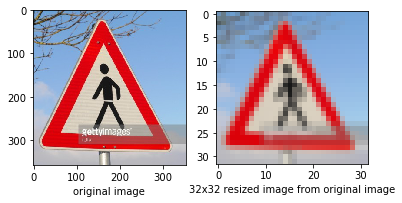

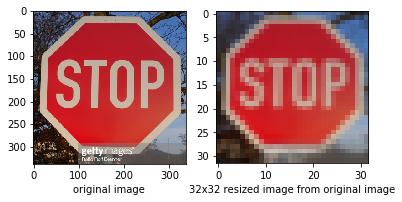

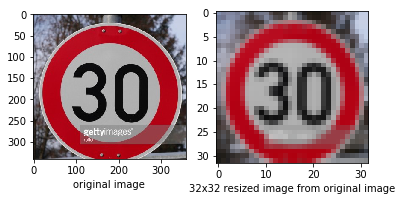

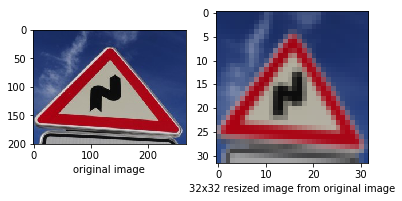

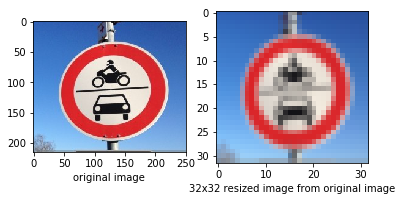

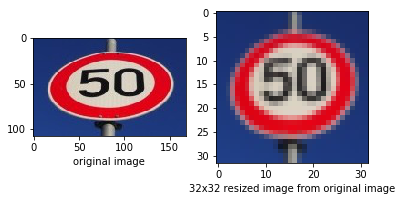

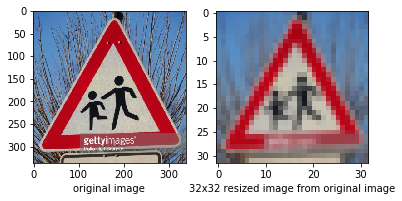

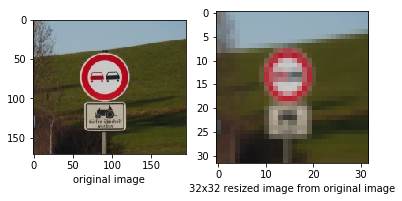

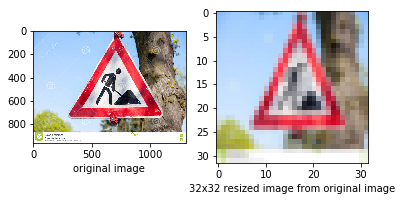

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import glob
import matplotlib.image as mpimg
import scipy
import csv

curr_dir = os.getcwd()

def get_traffic_sign_table(csv_file_path="None", traffic_sign_map=[]):
    traffic_csvfile = open(curr_dir + "/signnames.csv", "r")
    traffic_reader = csv.DictReader(traffic_csvfile)
    #print(traffic_reader)
    for row in traffic_reader:
        traffic_sign_map.append([row["ClassId"], row["SignName"]])
    #print(traffic_sign_map)


#get_traffic_sign_table()

image_path = curr_dir + "/images"
images = glob.glob(image_path+"/*.jpg")
print(len(images))
count = 2 * len(images)
resized_img = []
ori_img = []
for image in images:
    img = mpimg.imread(image)
    resized = scipy.misc.imresize(img, size=(32,32), interp='bilinear')
    plt.figure(count)
    plt.subplot(121)
    plt.xlabel("original image")
    plt.imshow(img)
    #plt.figure(count + 1)
    plt.subplot(122)
    plt.xlabel("32x32 resized image from original image")
    plt.imshow(resized)
    count = count - 2
    resized_img.append(resized)
    ori_img.append(img)



### Predict the Sign Type for Each Image

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

Prediction on New Image based on model that was trained using Augumentated Data through Rotation
Top-5 prob: [[ 0.99948549  0.00042639  0.0000621   0.00000872  0.00000585]
 [ 0.99707377  0.00216398  0.00058559  0.00010473  0.00007163]
 [ 0.9999845   0.00001539  0.00000014  0.00000001  0.        ]
 [ 0.99728978  0.00178313  0.00069286  0.00009488  0.00006946]
 [ 1.          0.00000001  0.          0.          0.        ]
 [ 0.72159892  0.26265711  0.01503842  0.00050192  0.00007865]
 [ 0.98862177  0.00996354  0.0004697   0.0003697   0.00027786]
 [ 0.99283302  0.0040791   0.00305657  0.00001895  0.0000069 ]
 [ 0.99996173  0.00002183  0.00001402  0.00000144  0.00000043]
 [ 0.24147727  0.22648677  0.12746343  0.08267608  0.05410266]
 [ 0.99950635  0.0002294   0.00011436  0.00006078  0.00003237]]

Top-5 prob indices [[30 28  5 11 29]
 [22 29 31 24 18]
 [27 24 18 11  4]
 [14 29 15  0  1]
 [ 1  2 16 32  6]
 [27 28 24 18 20]
 [16 28 30  2  8]
 [ 0  1  5  2 27]
 [28 30 29  1 21]
 [20 31  6  1 3

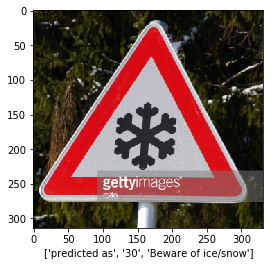

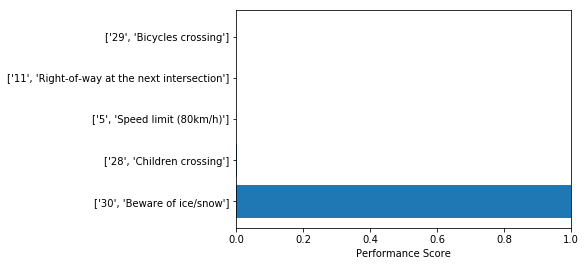

Predicted:['22', 'Bumpy road']


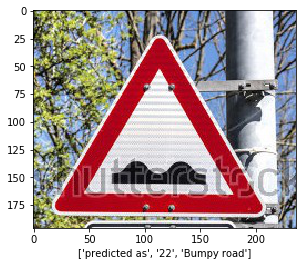

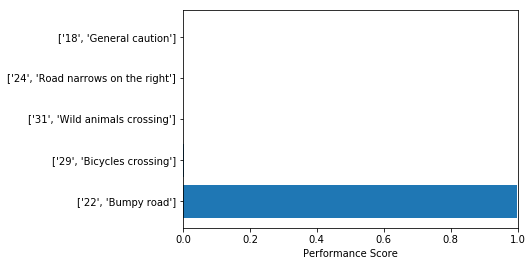

Predicted:['27', 'Pedestrians']


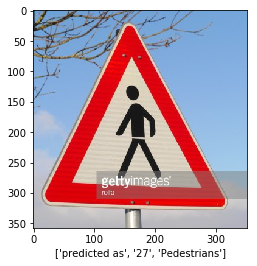

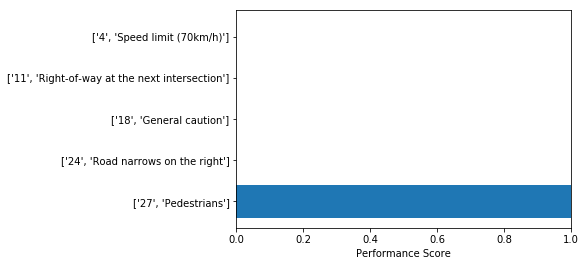

Predicted:['14', 'Stop']


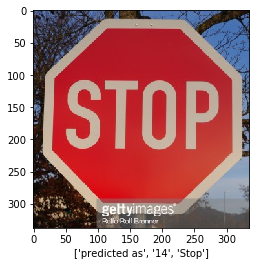

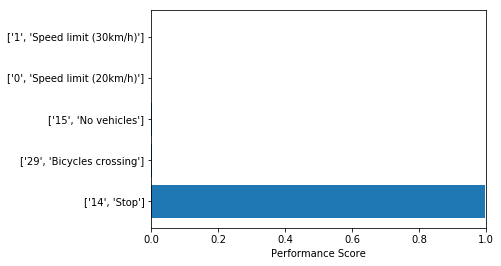

Predicted:['1', 'Speed limit (30km/h)']


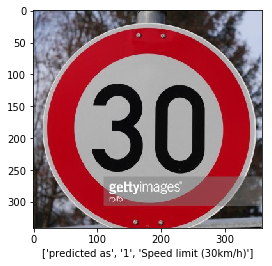

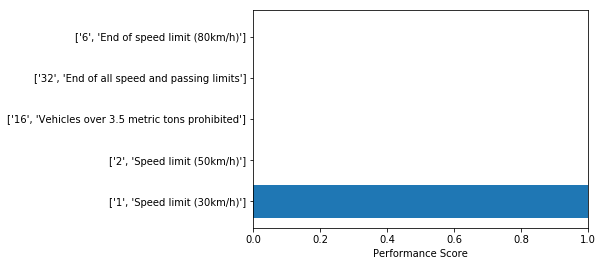

Predicted:['27', 'Pedestrians']


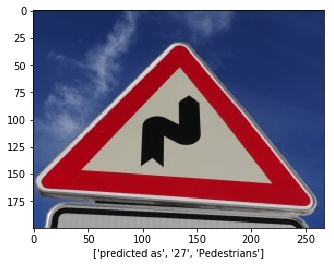

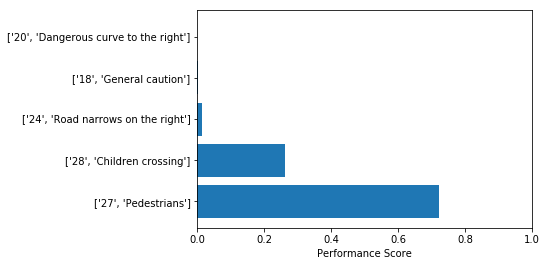

Predicted:['16', 'Vehicles over 3.5 metric tons prohibited']


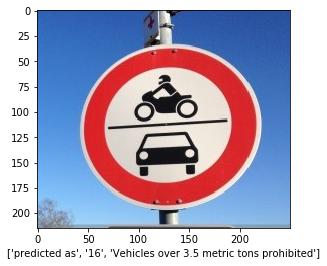

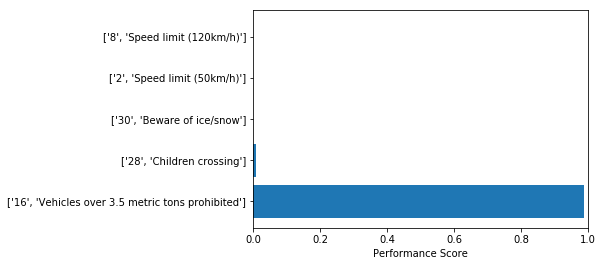

Predicted:['0', 'Speed limit (20km/h)']


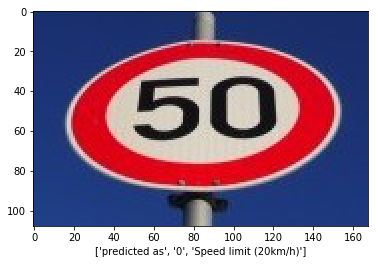

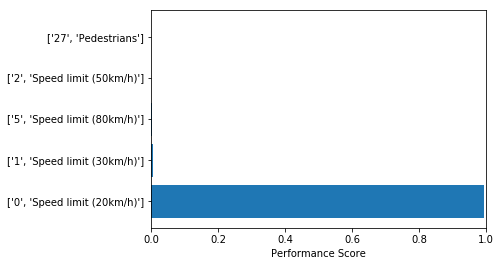

Predicted:['28', 'Children crossing']


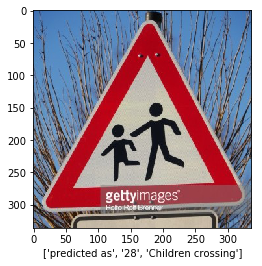

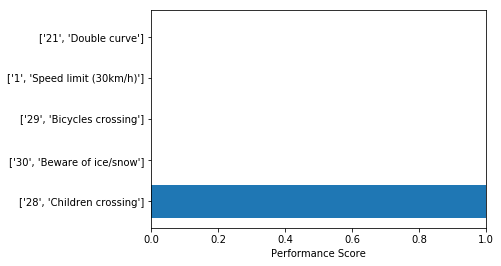

Predicted:['20', 'Dangerous curve to the right']


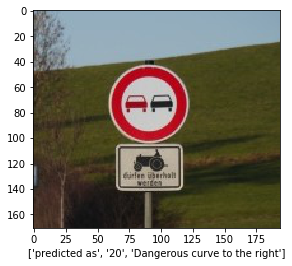

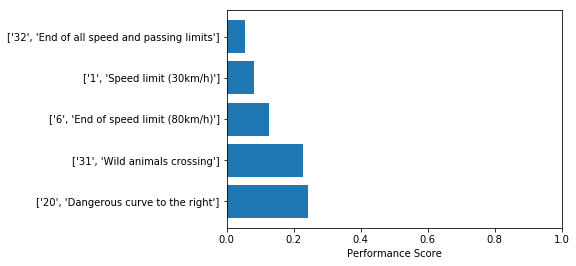

Predicted:['25', 'Road work']


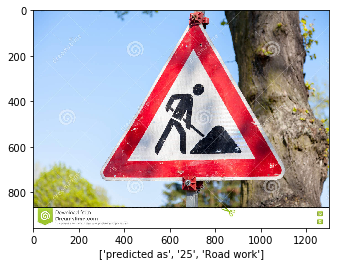

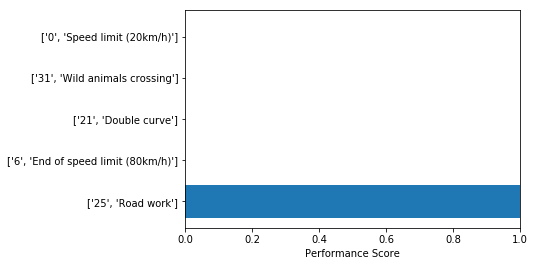

In [62]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_new_test_norm = (np.array(resized_img[:], dtype=float) - train_mean)/train_sigma
saver4 = tf.train.Saver()
traffic_sign_map = []
get_traffic_sign_table(traffic_sign_map = traffic_sign_map)
#print(traffic_sign_map)

print("Prediction on New Image based on model that was trained using Augumentated Data through Rotation")    
with tf.Session() as sess:
    #load the parameter
    #reset the already created buffer
    sess.run(tf.global_variables_initializer())
    #saver4.restore(sess, tf.train.latest_checkpoint('.'))
    #saver4.restore(sess, tf.train.latest_checkpoint('.'))
    saver4.restore(sess, './CNN_german_traffic_sign-final-17')

    #w = sess.run(weights)
    #b = sess.run(bias)
    
    #get pred_tensor 
    feed_input = {x_i:X_new_test_norm[:], y_i:[]}
    prediction_out = sess.run(pred_tensor, feed_input)
    top_5_prob_out = sess.run(top_5_prob, feed_input)
    top_5_index_out = sess.run(top_5_index, feed_input)

    #actual_pred_out = sess.run(actual_pred, feed_input)
    #top_1_pred_accuracy = np.mean(actual_pred_out)
    
    np.set_printoptions(suppress=True)
    print("Top-5 prob: {}" .format(top_5_prob_out))
    print()
    print("Top-5 prob indices {}".format(top_5_index_out))
    print()
    #print("Top-1 prediction {}".format(actual_pred_out))
    print()
    #print("Top-1 pred accuracy {}".format(top_1_pred_accuracy))
    print()
    
    import pylab
    #plt.figure(1)
    for i in range(len(top_5_index_out)):
        index = top_5_index_out[i][0]
        #print(index)
        print("Predicted:{}".format(traffic_sign_map[index]))
        plt.figure(i)
        #plt.subplot(621 + i)
        #plt.xlabel("Top-1 Model Prediction:")
        plt.xlabel( ["predicted as"] +  traffic_sign_map[index])
        #plt.xlabel(traffic_sign_map[top_5_index_out[i][1]])
        #plt.xlabel(traffic_sign_map[top_5_index_out[i][2]])
        #plt.xlabel(traffic_sign_map[top_5_index_out[i][3]])
        #plt.xlabel(traffic_sign_map[top_5_index_out[i][4]])
        plt.imshow(ori_img[i])

        plt.figure(i+1)
        val = (top_5_prob_out[i][0],
                     top_5_prob_out[i][1],
                     top_5_prob_out[i][2],
                     top_5_prob_out[i][3],
                     top_5_prob_out[i][4])
                     
        pos = arange(5)+.5         # the bar centers on the y axis
        pylab.barh(pos,val, align='center')
        pylab.yticks(pos, (traffic_sign_map[index], 
                     traffic_sign_map[top_5_index_out[i][1]], 
                     traffic_sign_map[top_5_index_out[i][2]], 
                     traffic_sign_map[top_5_index_out[i][3]], 
                     traffic_sign_map[top_5_index_out[i][4]]))
        pylab.xlim(0.0, 1.0,)
        pylab.xlabel('Performance Score')
        pylab.show()
        #print(val)
        #break


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [72]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Image and their hidden representation



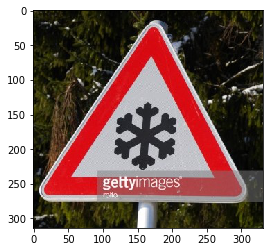

In [80]:
print("Image and their hidden representation")
plt.imshow(ori_img[0])
print()

(10, 32, 32, 3)


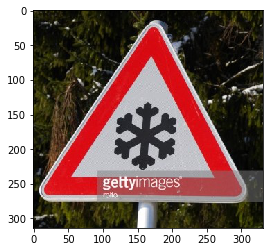

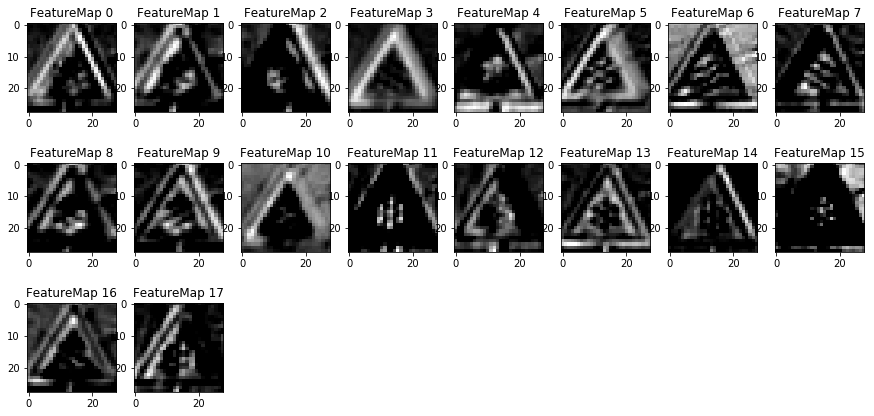

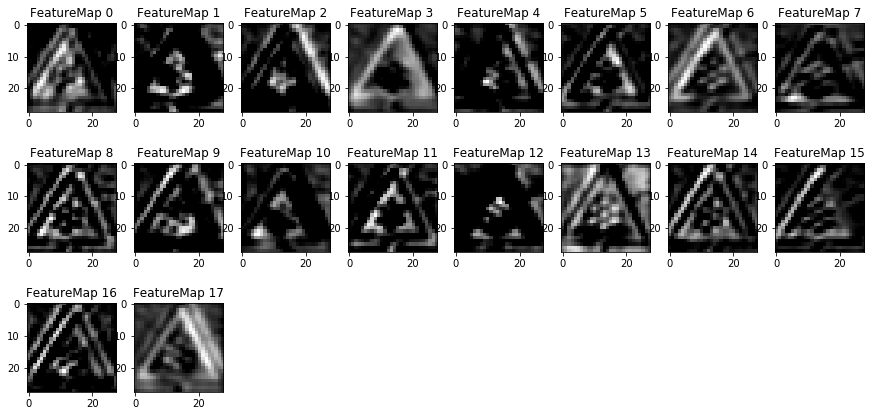

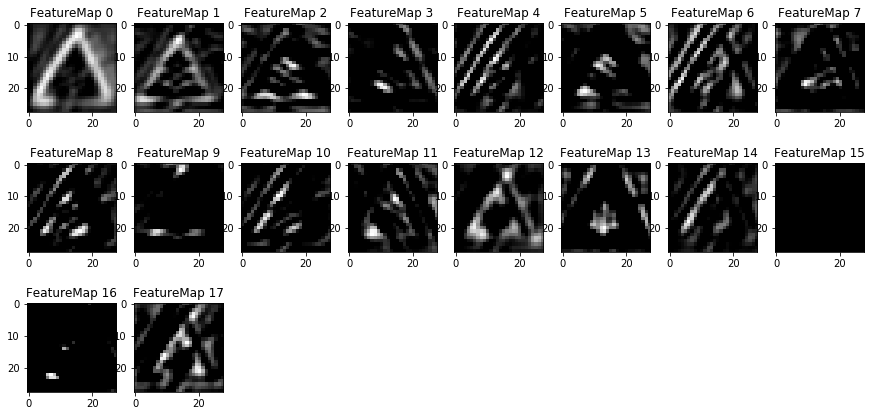

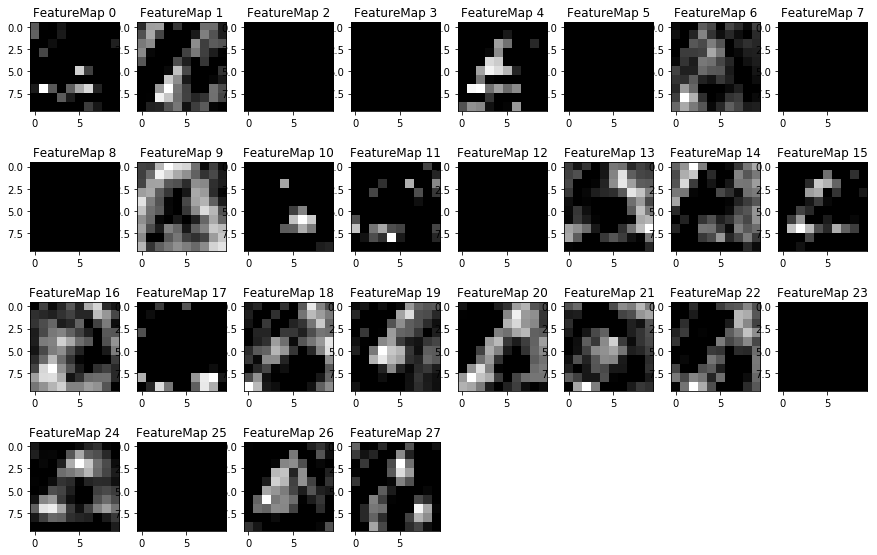

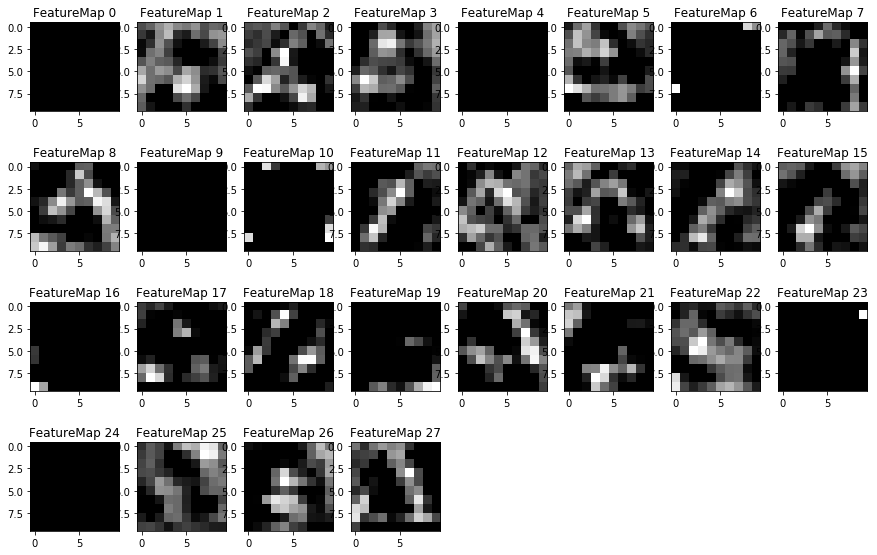

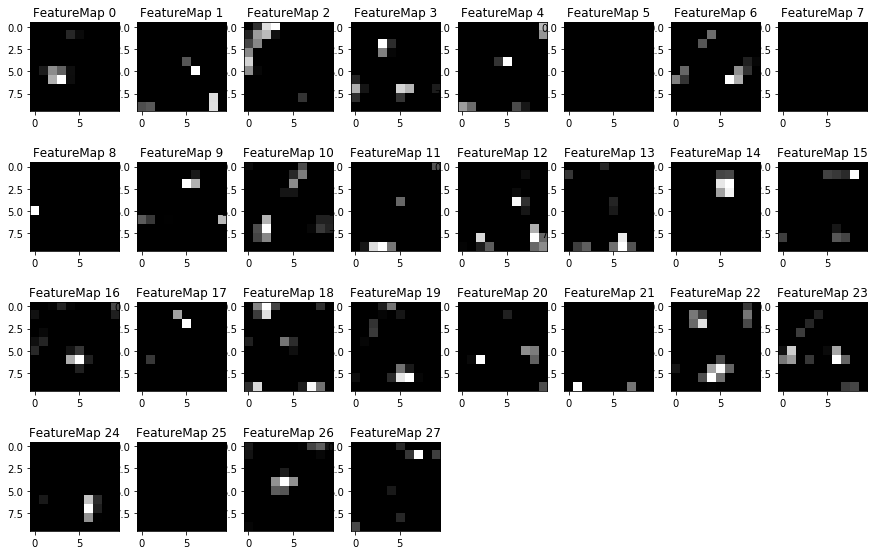

In [81]:
with tf.Session() as sess:
    print(X_new_test_norm.shape)
    sess.run(tf.global_variables_initializer())
    saver4.restore(sess, './CNN_german_traffic_sign-final-17')

    #feed_input = {x_i:[np.array(X_test_norm[0])]}
    #logits_out = sess.run(pred_tensor[0], feed_input)
    #print(pred_tensor[0])
 
    plt.figure(1)
    plt.imshow(ori_img[0])
 
    al1_tensor = tf.get_default_graph().get_tensor_by_name("AL1:0")
    outputFeatureMap([np.array(X_new_test_norm[0])], al1_tensor, plt_num=1+1)
    
    al2_tensor = tf.get_default_graph().get_tensor_by_name("temp_activation:0")
    #print(test)
    outputFeatureMap([np.array(X_new_test_norm[0])], al2_tensor,plt_num=2+1)

    al3_tensor = tf.get_default_graph().get_tensor_by_name("temp0_activation:0")
    outputFeatureMap([np.array(X_new_test_norm[0])], al3_tensor,plt_num=3+1)

    al4_tensor = tf.get_default_graph().get_tensor_by_name("AL2:0")
    outputFeatureMap([np.array(X_new_test_norm[0])], al4_tensor,plt_num=4+1)

    al5_tensor = tf.get_default_graph().get_tensor_by_name("temp1_activation:0")
    outputFeatureMap([np.array(X_new_test_norm[0])], al5_tensor,plt_num=5+1)

    al6_tensor = tf.get_default_graph().get_tensor_by_name("temp10_activation:0")
    outputFeatureMap([np.array(X_new_test_norm[0])], al6_tensor,plt_num=6+1)

 


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**:
The  sign image fed to the model had triangle with snow sign. Each feature map represents different chareteristc of the image, like triangle shape, its edges, snow shape and its edges. For each shape/object within image, some feature map isolates between object with its background. FeatureMap10 shows background while FeatureMap11 only snow edges. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 